In [90]:
import numpy as np
import math
import matplotlib.pyplot as plt

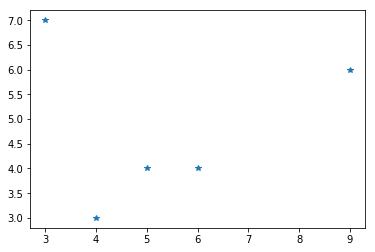

In [91]:
#x=[1.0,1.3,1.6,1.9,2.2]
#y=[0.7651977,0.6200860,0.4554022,0.28181816,0.1103623]
y=[3,4,4,6,7]
x=[4,5,6,9,3]

plt.plot(x,y,'*')
plt.show()

In [92]:
a=np.zeros((5,5))
for i in range(0,5):
    a[i][0]=y[i]

for i in range(1,i+1):
    for j in range(1,i+1):
        a[i][j]=(a[i][j-1]-a[i-1][j-1])/(x[i]-x[i-j])
print(a)

[[ 3.          0.          0.          0.          0.        ]
 [ 4.          1.          0.          0.          0.        ]
 [ 4.          0.         -0.5         0.          0.        ]
 [ 6.          0.66666667  0.16666667  0.13333333  0.        ]
 [ 7.         -0.16666667  0.27777778 -0.05555556  0.18888889]]


In [93]:
def Newtonmethod(x,y,u):
        sum=0
        for i in range(1,5):
            prod=1.0
            for j in range(0,i):
                prod=prod*(u-x[j])
            sum=sum+a[i][i]*prod
        
        return sum+a[0][0]
    
print(Newtonmethod(x,y,1.6))

41.91861333333334


In [94]:
valx=np.linspace(min(x),max(x),100)
yval=[]


for i in range(0,100):
    yval.append(Newtonmethod(x,y,valx[i]))
#print(y)




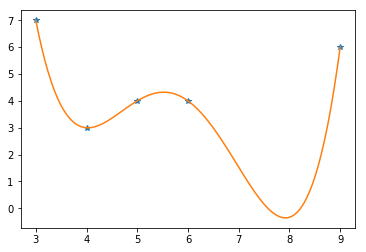

In [95]:
plt.plot(x,y,'*')
plt.plot(valx,yval) 
plt.show()
    

Otro Método con las difererncias divididas

In [129]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [130]:
x_list = [1,1.3,1.6,1.9,2.2]
y_list = [0.7651977,0.6200860,0.4554022,0.28181861,0.1103623]

n = len(x_list)

T = np.zeros((n,n))
print(T)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [131]:
#Diagonal
for i in range (0,n): #filas
    for j in range(0,n): #columnas
        if i == j:
            T[i][j] = y_list[j]
        else:
            continue

#Diagonales no principales
for k in range(1,n):
    for i in range(0,n-1):  
        for j in range(1,n):
            if j != i and j == i + k:
                T[i][j] = (T[i+1][j] - T[i][j-1]) / (x_list[j] - x_list[i])

print(T)

[[ 0.7651977  -0.48370567 -0.10873389  0.06587846  0.0018249 ]
 [ 0.          0.620086   -0.548946   -0.04944328  0.06806833]
 [ 0.          0.          0.4554022  -0.57861197  0.01181822]
 [ 0.          0.          0.          0.28181861 -0.57152103]
 [ 0.          0.          0.          0.          0.1103623 ]]


In [132]:
#Polinomio interpolante

def IterpNewton(x_list,y_list,x):
    #if x_list[0]<=x<=x_list[n]:
        sum=0
        for i in range(1,n):
            prod=1.0
            for j in range(0,i):
                prod=prod*(x-x_list[j])
            sum=sum+T[0][i]*prod
        
        return sum+T[0][0] 
        


In [133]:
valx=np.linspace(min(x_list),max(x_list),100)
yval=[]


for i in range(0,100):
    yval.append(IterpNewton(x_list,y_list,valx[i]))

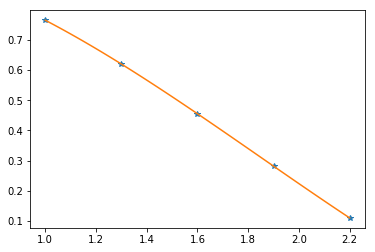

In [134]:
plt.plot(x_list,y_list,'*')
plt.plot(valx,yval) 
plt.show()